This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Introduction

Under COVID-19 situation, many airline companies are facing a hard time in running the business. Being in a plane would be a high-risk activity because of the confined space. Also, many countries have shut down the border so as to minimize the way of spreading the virus. Therefore, people are not travelling overseas now and the revenue of the airlines companies drops significantly. In this project, the significance of factors which lead to customer satisfaction of the flight experience is evaluated. It is targeted to provide the insight to the airline companies for preparing the important criteria now, and provide better service to the passengers after the COVID-19 outbreak.

# Data

The dataset is found in Kaggle. There are about 104,000 rows in the dataset. Also, there are 24 columns in the dataset, including the background information of the passengers, the satisfaction level on different aspects, and the overall satisfaction level. Model of regression analysis would be built to evaluate the correlation between specific aspects of satisfaction level and the overall level.

# Data Preparation

First, training dataset would be imported as a dataframe.

In [4]:
df = pd.read_csv("train.csv", index_col = 0)

Then, an overview of the dataset would be shown.

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


As ID is irrelevant, the ID column would be dropped.

In [6]:
df.drop("id", axis = 1, inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


For the ease of analysis, overall satisfaction level will be changed into dummy variable, which "satisfied" would become True and "neutral or dissatisfied" would become False.

In [7]:
satisfied = pd.get_dummies(df["satisfaction"], drop_first = True)
satisfied.rename(columns={"satisfied":"Overall Satisfied"}, inplace = True)
df = pd.concat([df, satisfied], axis = 1)
df.drop("satisfaction", axis = 1, inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Fianlly, summary statistic of all columns would be shown.

In [8]:
df.describe(include = "all")

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Overall Satisfied
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000


# Data Evaluation

NameError: name 'plt' is not defined

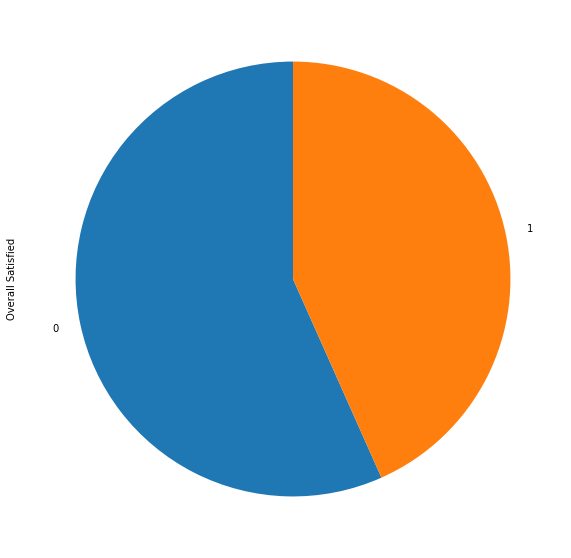

In [77]:
df["Overall Satisfied"].value_counts().plot(kind="pie", figsize=(10,10), startangle = 90)
plt.title("Distribution of Overall Satisfaction Level")
plt.axis("equal")
plt.ylabel("")
plt.show()

From the above pie chart, this is a quite balanced labeled dataset.

# Signle Factor Analysis

Factors could be evaluated one by one to evaluate the signifinance to the overall satisfaction level.

In [10]:
factorsControllable = df.drop(columns=["Gender","Customer Type","Age","Type of Travel","Class","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"])

To have a better look, the satisfaction levels of the above factors would become percentage.

In [11]:
factorsControllable_new = factorsControllable * 20/100
factorsControllable_new["Overall Satisfied"] = factorsControllable_new["Overall Satisfied"] / 20*100

In [12]:
factorsControllable_new.groupby("Overall Satisfied").mean()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Overall Satisfied,,,,,,,,,,,,,,
0.0,47.992663,62.582245,50.937006,59.522410,59.160991,53.122505,60.725895,57.883116,60.383159,59.816233,67.519829,60.859050,67.776287,58.722465
1.0,63.225763,59.406108,60.631649,59.557579,70.426208,80.549473,79.330594,79.298612,77.146474,76.442865,79.327929,72.920822,79.389228,74.886841


Visualization by bar chart can be performed so as to have a easier understanding of the data.

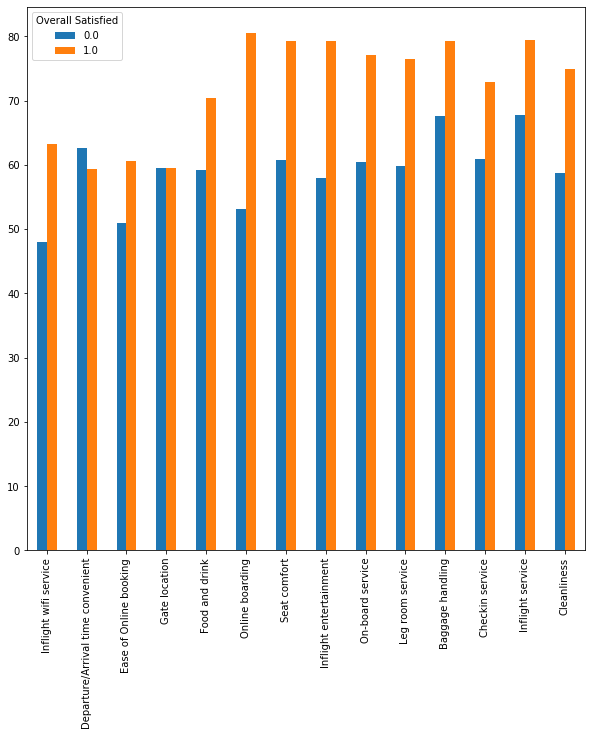

In [13]:
factorsControllable_new.groupby("Overall Satisfied").mean().transpose().plot(kind="bar", figsize = (10,10))

It is believed that the higher the satisfaction level in a single factor, the more chance that the overall satisfaction level is satisfied. From the above graph, the factors of online booking, inflight entertainment and seat comfort would greatly affect the overall satisfaction level, as the mean of satisfaction level which the group of people is overall satisfied is evidently greater than that of others. However, the factors of departure / arrival time convenient and gate location has the opposite result. For the factor of gate location, people who have the different overall satisfaction level have nearly the same satisfaction level in the gate location. For the factor of departure / arrival time convenient, people who are overally unsatisfied has a higher satidfaction level in the factor of departure / arrival time convenient than that of others. Therefore, this may illustrate that the factor of departure / arrival time convenient and gate location does not really affect the overall satisfaction level.

# Multiple Factors Analysis - Logistic Regression

As the target is a binary variable, logistic regression is used to develop to use the factors to predict the overall satisfaction level.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [64]:
X = factorsControllable[["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort","Inflight entertainment","On-board service","Leg room service","Baggage handling","Checkin service","Inflight service","Cleanliness"]]

In [65]:
Y = factorsControllable["Overall Satisfied"]

In [66]:
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
Yhat = model.predict(X)

In [74]:
model.intercept_

array([-7.62406913])

In [75]:
model.coef_

array([[ 0.30472856, -0.29527595, -0.13290415,  0.12406888, -0.07312879,
         0.82642633,  0.15850747,  0.29444351,  0.27612198,  0.35311107,
         0.05478284,  0.21945884,  0.01345976,  0.03940116]])

From the above results, the sixth factor is the most significant factor affecting the overall satisfaction level, which is online boarding. The second most significant factor is the tenth factor which is the leg room service. The third most significant factor is the first factor which is the inflight wifi service.

# Conclusion

From the above results generated, it is suggested the airline company should focus on online boarding service, leg room service, inflight wifi service, inflight entertainment and seat comfort. For example, they can upgrade the interface of online boarding service to be more user-friendly, update the inflight entertainment so that new movies and TV shows can be watched in the plane, Provide wifi service for more passengers to access, etc. By focusing at these factors, the overall satisfaction level of the passengers are believed to be increased efficiently.